$\Large\textbf{Lab 5.} \large\textbf{Exercise 1.}$



Recall that to solve problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$, the update rule involved in Newton's method is of the form: 
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k (\nabla^2 f(\mathbf{x}^{k}))^{-1} \nabla f(\mathbf{x}^{k}).   
\end{align}

Now we will discuss a method which avoids explicit computation of the inverse of Hessian matrix at each iteration, but is nearly efficient as the Newton's method. This method will be called BFGS named after the famous applied Mathematicians Broyden, Fletcher, Goldfarb and Shanno. 

The main idea of BFGS method is to replace the inverse of Hessian matrix $(\nabla^2 f(\mathbf{x}^{k}))^{-1}$ in the update rule of Newton's method with a surrogate term $B^k$. 

Therefore the update rule of BFGS looks as follows:
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k B^k \nabla f(\mathbf{x}^{k})   
\end{align}
where $B^k$ is a surrogate for the inverse of Hessian matrix. 

To find a suitable candidate for $B^k$, we need to consider some favorable characteristics expected from $B^k$: 

\begin{align}
&B^k \text{ is symmetric positive definite}.  \\
&B^k \text{ does not involve computing Hessian or its inverse and should be computable only from the gradients}.  \\
&\text{Replacing  } (\nabla^2 f(\mathbf{x}^{k}))^{-1} \text{ with } B^k \text{ should not slow down the algorithm too much}. \\ 
\end{align}




To design a suitable $B^k$ we shall consider the quadratic approximation of $f$:

\begin{align}
\tilde{f}(\mathbf{x}) = f(\mathbf{x}^{k+1}) + \left \langle \nabla f(\mathbf{x}^{k+1}), \mathbf{x}-\mathbf{x}^{k+1}\right \rangle  + \frac{1}{2} (\mathbf{x}-\mathbf{x}^{k+1})^\top H^{k+1} (\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}
where $H^{k+1} = \nabla^2 f({\mathbf{x}}^{k+1})$.

Note that using this quadratic approximation we have the gradient as:
\begin{align}
\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}

In order to assume $\tilde{f}$ to behave similar to $f$, we expect the following. 

By plugging in $\mathbf{x} = \mathbf{x}^k$ and $\mathbf{x}=\mathbf{x}^{k+1}$, we expect the following from the previous gradient equation:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k) \text{ and }\\ 
\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1}). 
\end{align}

The relation $\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1})$ directly follows from the gradient relation  $\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1})$.

For the gradient relation to satisfy $\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k)$ we need:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) &= \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^k) \\
\implies H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) &= (\nabla f(\mathbf{x}^{k})- \nabla {f} (\mathbf{x}^{k+1})) \\
\implies H^{k+1}(\mathbf{x}^{k+1}-\mathbf{x}^{k}) &= (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k)).
\end{align}
This previous equality is called the $\textbf{secant equation}$. 

From the secant equation we see that inverse of $H^{k+1}$ operates on the difference of gradients $(\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$  to yield the difference of iterates $(\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

The secant equation can be equivalently and compactly written as:
\begin{align}
(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k. 
\end{align}
where $\mathbf{y}^k = (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$ and $\mathbf{s}^k = (\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

We shall be considering $(H^{k+1})^{-1}$ as a possible choice for $B^{k+1}$ in the BFGS update rule. 

Hence we make sure that $(H^{k+1})^{-1}$ is positive definite. This is equivalent to considering: 
\begin{align}
(\mathbf{y}^{k})^\top (H^{k+1})^{-1} \mathbf{y}^k > 0 
\end{align}
for any non-zero $\mathbf{y}^k$ which implies that $(\mathbf{y}^k)^\top \mathbf{s}^k > 0$. 


Generally solving the secant equation $(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k$ leads to infinitely many solutions for the matrix $(H^{k+1})^{-1}$ since there are $n^2$ unknowns and $n$ equations. Hence to select a suitable $(H^{k+1})^{-1}$ we solve an optimization problem of the form: 

\begin{align}
\min_H \|H-(H^k)^{-1}\| \ s.t. \ H=H^\top, \ H\mathbf{y}^k=\mathbf{s}^k.
\end{align}
By using an appropriate norm in the optimization problem, we can get the following update rule for the matrix $(H^{k+1})^{-1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) (H^{k})^{-1} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

By taking $B^k = (H^k)^{-1}$, this update rule can now be written as:

$B^{k+1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) B^{k} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

As long as $B^k$ is positive definite, the update rule guarantees that $B^{k+1}$ is also positive definite. 

Hence in Exercises 1 and 2, we shall be implementing BFGS method to solve problems of the form $\min_{\mathbf{x}\in{\mathbb{R}}^n} f(\mathbf{x})$, and check its  performance against Newton method. 

In [1]:
#Let us now check the time taken for computing the inverse of a matrix A
from timeit import default_timer as timer
import numpy as np 

#create a random nxn matrix 
n = 100
B = np.random.rand(n, n)
A = np.matmul(B,B.T) #Note: This construction ensures that A is symmetric
A = np.add(A, 0.001*np.identity(n)) #this diagonal perturbation helps to make the matrix positive definite 

start_time = timer()
A_inv = np.linalg.inv(A)
end_time = timer()
print('Time taken to compute inverse of A:',end_time - start_time) 

Time taken to compute inverse of A: 0.006132827999977053


$ \huge{1.}$

Identity matrix could be a suitable initial choice $B_0$. This is an appropriate choice as it has good convergence properties, especially when the eigenvalues of the Hessian are well-conditioned. \
In general, any diagonal matrix can act as a decent choice for $B_0$.

$ \huge{2.}$

In [2]:
def evalf(x,n):  
  #Input: x is a numpy array of size n
  assert type(x) is np.ndarray and len(x) == n #do not allow arbitrary argument 
  val = 0
  for i in range(n-1):   # computing value of function
    val += 4*(x[i]**2 - x[i+1])**2 + (x[i] - 1)**2 
  return val

In [3]:
def evalg(x,n):  
  #Input: x is a numpy array of size n
  assert type(x) is np.ndarray and len(x) == n #do not allow arbitrary arguments 
  grad = [16*(x[0]**2 - x[1])*x[0] + 2*(x[0] -1)]
  for i in range(n-2):
     grad.append(16*(x[i+1]**2 - x[i+2])*x[i+1] + 2*(x[i+1] -1) - 8*(x[i]**2 - x[i+1]))
  grad.append(- 8*(x[n-2]**2 - x[n-1]))   
  return np.array(grad).reshape((n,1))

In [4]:
def compute_steplength_backtracking_scaled_direction(n,x, gradf, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray and len(x) == n 
  assert type(gradf) is np.ndarray and len(gradf) == n  
  assert type(direction) is np.ndarray and len(gradf) == n
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  alpha = alpha_start
  while evalf(x+alpha*direction,n)>evalf(x,n)+gamma*alpha*np.matmul(gradf.T,direction):
    alpha=rho*alpha

  return alpha

In [5]:
BACKTRACKING_LINE_SEARCH = 1

In [6]:
def BFGS_minimizer(n,start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray  and len(start_x) == n   #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 

  x = start_x.reshape((n,1))
  g_x = evalg(x,n)
  I = np.identity(n)
  B_k = I
  
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    p_k = -np.matmul(B_k, g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(n, x, g_x, p_k, alpha_start, rho, gamma)
    else:  
      raise ValueError('Line search type unknown. Please check!')

    x_prev = x
    s_k = np.multiply(step_length,p_k)  
    x = np.add(x, s_k)
    y_k = evalg(x,n)-evalg(x_prev,n)

    u_k = 1/(np.matmul(y_k.T,s_k))
    a_1 = np.subtract(I , u_k*np.matmul(s_k,y_k.T))
    a_2 = np.subtract(I , u_k*np.matmul(y_k, s_k.T))
    B_k = np.matmul(np.matmul(a_1,B_k),a_2) + u_k*np.matmul(s_k,s_k.T)

    k += 1 
    g_x = evalg(x,n) 

  return x, evalf(x,n), k

$ \huge{3.}$

In [7]:
my_tol = 1e-3
bfgs_time = []
x_val = []
obj_val = []
num_itr = []

In [8]:
n=1000
my_start_x = np.array([0 for i in range(n)])
strt_time = timer()
x_opt ,f_val ,k = BFGS_minimizer(n, my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,0.9,0.5,0.5 )
end_time = timer()
num_itr.append(k)
x_val.append(x_opt)
obj_val.append(f_val)
bfgs_time.append(end_time - strt_time)

In [9]:
n=2500
my_start_x = np.array([0 for i in range(n)])
strt_time = timer()
x_opt ,f_val ,k = BFGS_minimizer(n, my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,0.9,0.5,0.5 )
end_time = timer()
num_itr.append(k)
x_val.append(x_opt)
obj_val.append(f_val)
bfgs_time.append(end_time - strt_time)

In [10]:
n=5000
my_start_x = np.array([0 for i in range(n)])
strt_time = timer()
x_opt ,f_val ,k = BFGS_minimizer(n, my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,0.9,0.5,0.5 )
end_time = timer()
num_itr.append(k)
x_val.append(x_opt)
obj_val.append(f_val)
bfgs_time.append(end_time - strt_time)

In [11]:
n=7500
my_start_x = np.array([0 for i in range(n)])
strt_time = timer()
x_opt ,f_val ,k = BFGS_minimizer(n, my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,0.9,0.5,0.5 )
end_time = timer()
num_itr.append(k)
x_val.append(x_opt)
obj_val.append(f_val)
bfgs_time.append(end_time - strt_time)

In [12]:
n=10000
my_start_x = np.array([0 for i in range(n)])
strt_time = timer()
x_opt ,f_val ,k = BFGS_minimizer(n, my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,0.9,0.5,0.5 )
end_time = timer()
num_itr.append(k)
x_val.append(x_opt)
obj_val.append(f_val)
bfgs_time.append(end_time - strt_time)

In [14]:
n_choices = [1000,2500,5000,7500,10000]

# for n in n_choices:
#   my_start_x = np.array([0 for i in range(n)])
#   strt_time = timer()
#   x_opt ,f_val ,k = BFGS_minimizer(n, my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,0.9,0.5,0.5 )
#   end_time = timer()
#   num_itr.append(k)
#   x_val.append(x_opt)
#   obj_val.append(f_val)
#   bfgs_time.append(end_time - strt_time)


In [15]:
from tabulate import tabulate

In [16]:
table_0 = []
col = ["n value", "minimizer", 'objective function value']
table_0.append(col)
for i in  range(len(n_choices)):
    lst = []
    lst.append(n_choices[i])
    lst.append(x_val[i])
    lst.append(obj_val[i])
    table_0.append(lst)
    
print(tabulate(table_0, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═══════════╤════════════════╤════════════════════════════╕
│   n value │ minimizer      │   objective function value │
╞═══════════╪════════════════╪════════════════════════════╡
│      1000 │ [[0.99999852]  │                1.50977e-08 │
│           │  [0.99999906]  │                            │
│           │  [0.9999996 ]  │                            │
│           │  [0.9999995 ]  │                            │
│           │  [0.99999973]  │                            │
│           │  [0.99999922]  │                            │
│           │  [0.99999952]  │                            │
│           │  [0.9999991 ]  │                            │
│           │  [0.99999961]  │                            │
│           │  [0.99999917]  │                            │
│           │  [0.9999997 ]  │                            │
│           │  [0.99999908]  │                            │
│           │  [0.99999979]  │                            │
│           │  [0.99999914]  │          

In [17]:
table = []
col = ["n", "Time taken by BFGS method"]
table.append(col)
for i in  range(len(n_choices)):
    lst = []
    lst.append(n_choices[i])
    lst.append(bfgs_time[i])
    table.append(lst)
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═══════╤═════════════════════════════╕
│     n │   Time taken by BFGS method │
╞═══════╪═════════════════════════════╡
│  1000 │                     25.2853 │
├───────┼─────────────────────────────┤
│  2500 │                    194.056  │
├───────┼─────────────────────────────┤
│  5000 │                   1562.29   │
├───────┼─────────────────────────────┤
│  7500 │                   5043.44   │
├───────┼─────────────────────────────┤
│ 10000 │                  10754      │
╘═══════╧═════════════════════════════╛


$ \huge{4.}$

In [18]:
#method to find Hessian matrix
def evalh(x,n):
  assert type(x) is np.ndarray and len(x) == n #do not allow arbitrary type arguments 
  hes = np.zeros((n,n))
  hes[0][0] = 48*x[0]**2 - 16*x[1] + 2
  hes[0][1] = -16*x[0]

  for i in range(1,n-1):
    hes[i][i] = 8 + 16*(x[i]**2 - x[i+1]) + 32*x[i]**2 +2
    hes[i][i+1] = -16*x[i]
    hes[i][i-1] = hes[i-1][i] #because it is a symmetric matrix
  hes[n-1][n-2] = hes[n-2][n-1]
  hes[n-1][n-1] = 8

  return hes

In [19]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_newton(n,start_x, tol, line_search_type,*args):
  assert type(start_x) is np.ndarray and len(start_x) == n #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0.

  x = start_x
  g_x = evalg(x,n)
  
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    D_k = np.linalg.inv(evalh(x,n))
    p_k = -np.matmul(D_k,g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(n,x,g_x,p_k,alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.add(x, np.multiply(step_length,p_k))
    k += 1 #increment iteration
    g_x = evalg(x,n) #compute gradient at new point
   
  return x ,evalf(x,n),k

$ \huge{5.}$

In [20]:
n_val = [1000,2500,5000,7500,10000]
my_tol = 1e-3
new_time = []
x_val1 = []
obj_val1 = []
num_itr1 =[]
m=0
for n in n_val:
  my_start_x = np.array([0 for i in range(n)]).reshape((n,1))
  str_time = timer()
  x_opt1 ,f_val1 ,k1 = find_minimizer_newton(n, my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,0.9,0.5,0.5 )
  e_time = timer()
  num_itr1.append(k1)
  x_val1.append(x_opt1)
  obj_val1.append(f_val1)
  new_time.append(e_time - str_time)
  print("Optimizer: ",x_val1[m])
  m=m+1
print("Objective: ",obj_val1)
print("Time taken: ",new_time)  

KeyboardInterrupt: ignored

The execution had to be interrupted as Newton's method was not terminating. A possibility as to why this is happening could be that the method was taking too much time to compute the inverse of the Hessian matrix.

$ \huge{6.}$

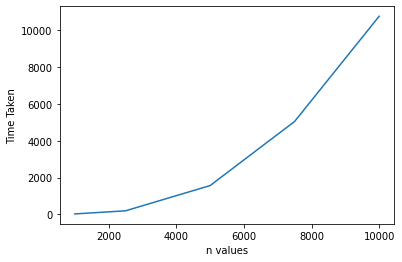

In [21]:
import matplotlib.pyplot as plt

plt.plot(n_val , bfgs_time, label = "Time taken by BFGS")
plt.xlabel("n values")
plt.ylabel("Time Taken")
plt.show()